<a href="https://colab.research.google.com/github/Yandres25/FuzzySystem/blob/main/Cardio1_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Fuzzy Control System: Riesgo Cardiovascular Completo
# Objetivo: Estimar el riesgo de CHD usando todas las variables clínicas difusas
!pip install scikit-fuzzy

import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt



In [197]:
A# 0. Carga de datos desde archivo local
# Ejecuta esta celda y sube el archivo 'cardio.csv'
uploaded = files.upload()  # sube cardio.csv
df = pd.read_csv('cardio.csv', sep=';')

Saving cardio.csv to cardio (5).csv


In [198]:
# 1. Carga de datos
# Base de datos 'cardio.csv' con separador ';'
df = pd.read_csv('cardio.csv', sep=';')



In [199]:
#Ver variables df
df.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [200]:
print(df.dtypes)


ind            int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object


In [201]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ind        462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [202]:
#Eliminar columna ind
df = df.drop('ind', axis=1)

In [203]:
# Copiar df
df_tree = df.copy()

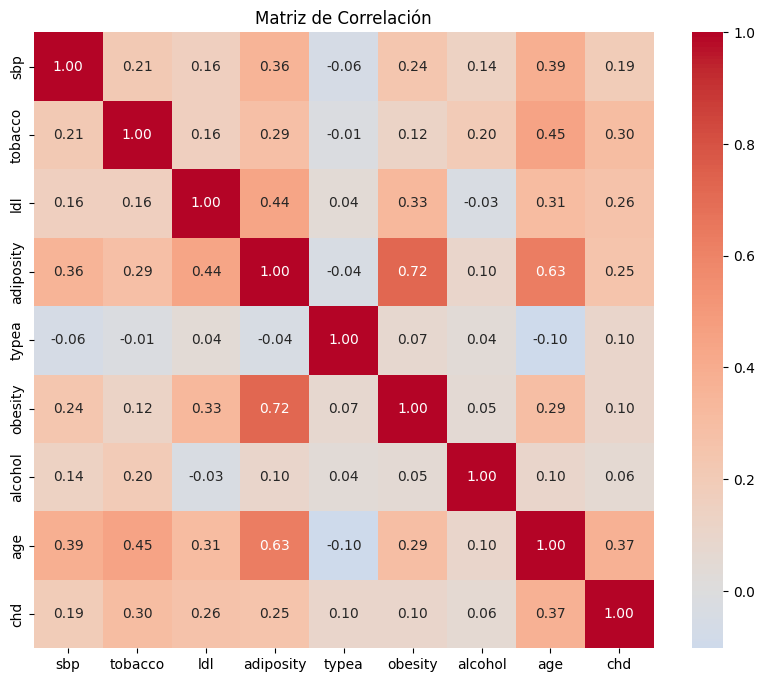

In [204]:
import seaborn as sns

# Primero aseguramos que la columna target esté en minúsculas para evitar errores
target_col = 'chd'
# Seleccionamos columnas numéricas y el target
cols_corr = df_tree.select_dtypes(include=np.number).columns.tolist()
if target_col not in cols_corr:
    cols_corr.append(target_col)

# Calculamos la matriz de correlación solo con esas columnas
corr_matrix = df_tree[cols_corr].corr()

# Graficamos
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


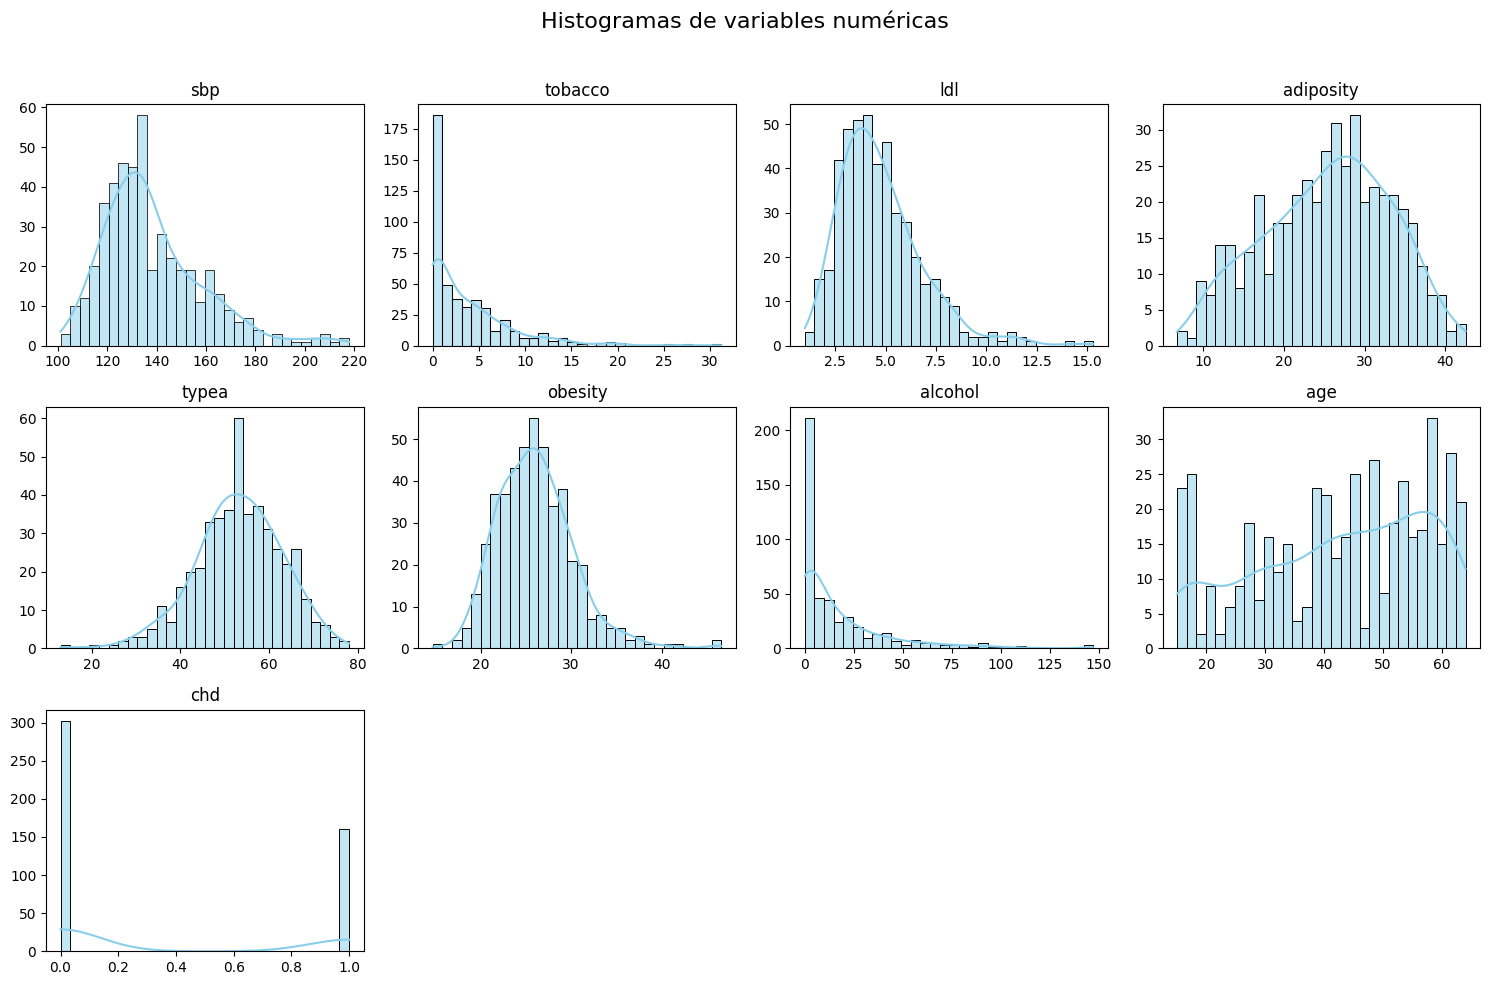

In [205]:
# Histogramas atractivos de variables numéricas
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle('Histogramas de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [163]:
# 2. Definición de variables difusas (Antecedentes clínicos)
# Obesidad (BMI): 10–50
obesidad   = ctrl.Antecedent(np.arange(10, 51, 1), 'obesidad')
# Presión arterial sistólica (sbp): 80–200 mmHg
sbp        = ctrl.Antecedent(np.arange(80, 201, 1), 'sbp')
# Colesterol LDL: 50–200 mg/dL
ldl        = ctrl.Antecedent(np.arange(0, 16, 1), 'ldl')
# Adiposidad (%): 10–40%
adiposity  = ctrl.Antecedent(np.arange(10, 41, 1), 'adiposity')
# Tipo A (typea): 20–80 unidades
typea      = ctrl.Antecedent(np.arange(20, 81, 1), 'typea')
# Consumo de alcohol (alcohol): 0–200 g/semana
alcohol    = ctrl.Antecedent(np.arange(0, 201, 1), 'alcohol')
# Consumo de tabaco (tobacco): 0–20 g/día
tobacco    = ctrl.Antecedent(np.arange(0, 21, 1), 'tobacco')
# Edad: 25–75 años
age        = ctrl.Antecedent(np.arange(25, 76, 1), 'age')
# Antecedentes familiares (famhist): 0=Ausente,1=Presente
famhist    = ctrl.Antecedent(np.arange(0, 2, 1), 'famhist')

# 3. Variable de salida
# Riesgo de CHD: 0–100%
risk       = ctrl.Consequent(np.arange(0, 101, 1), 'risk')



Text(0.5, 1.0, 'Riesgo de CHD (%)')

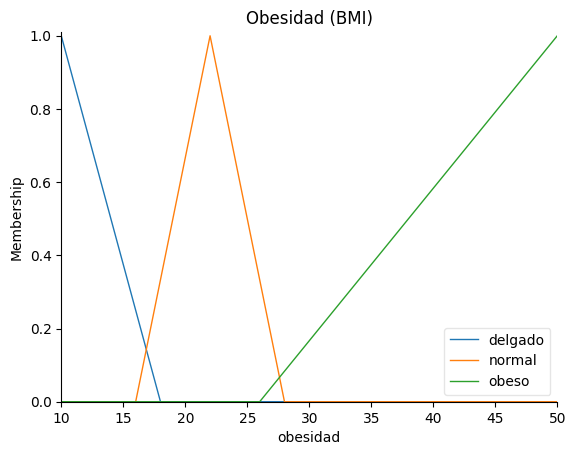

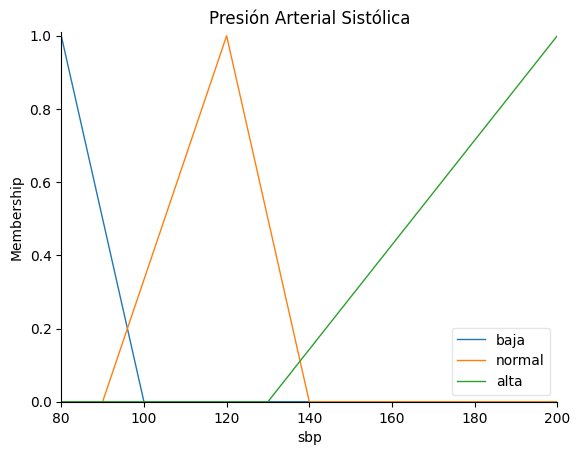

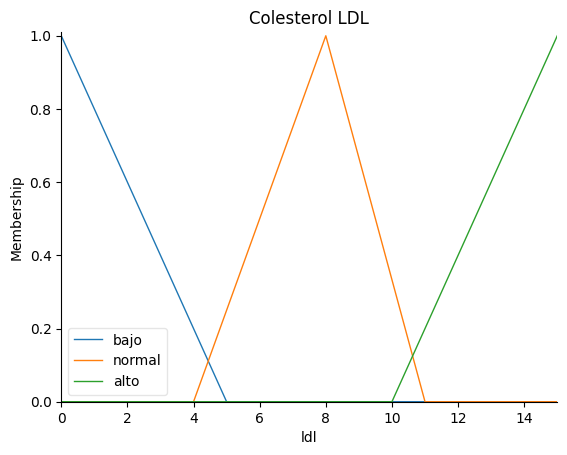

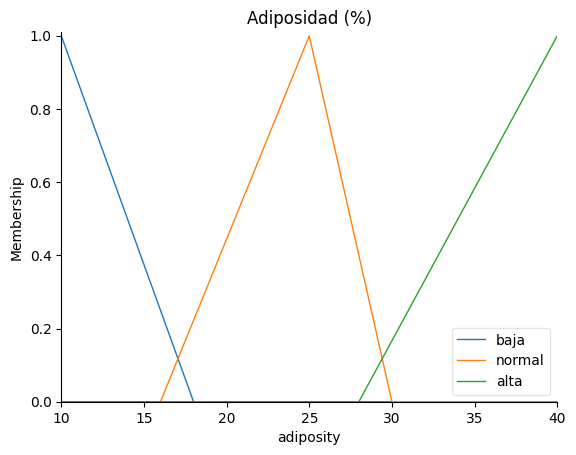

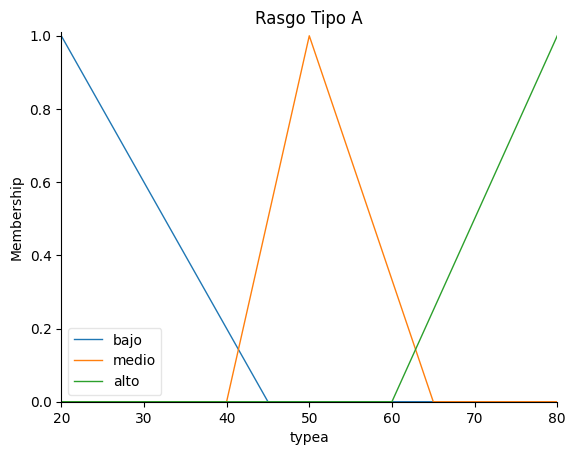

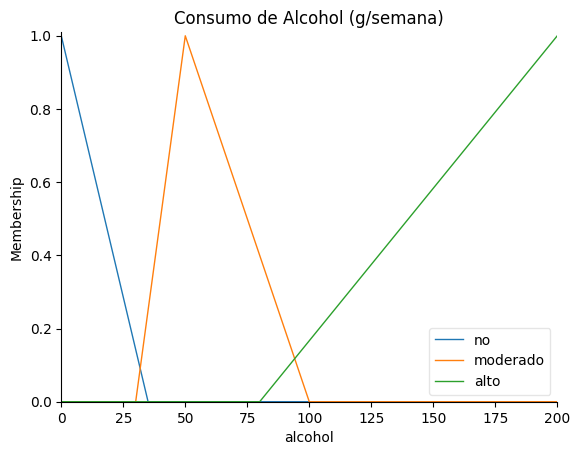

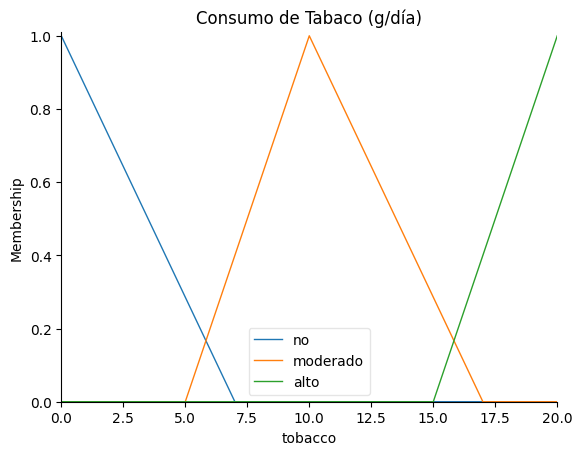

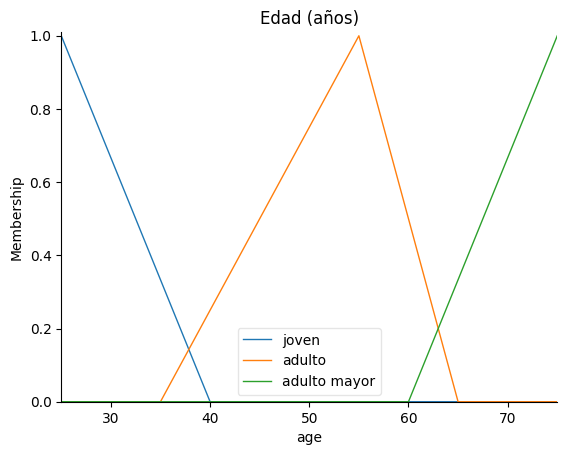

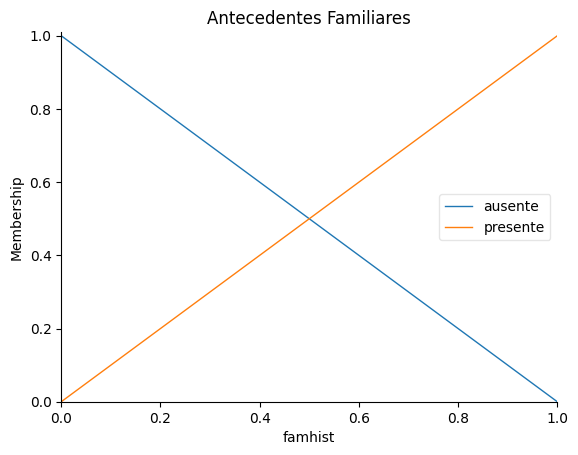

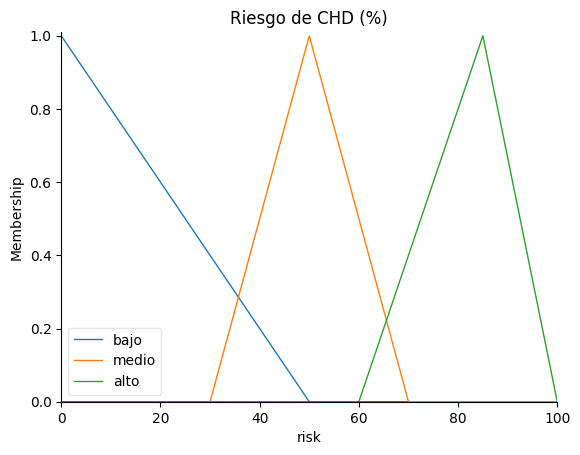

In [164]:
# 4. Funciones de pertenencia y visualización
# Obesidad
obesidad['delgado'] = fuzz.trimf(obesidad.universe, [10, 10, 18])
obesidad['normal']  = fuzz.trimf(obesidad.universe, [16, 22, 28])
obesidad['obeso']    = fuzz.trimf(obesidad.universe, [26, 50, 50])
obesidad.view()
plt.title('Obesidad (BMI)')

# SBP
sbp['baja']    = fuzz.trimf(sbp.universe, [80, 80, 100])
sbp['normal']  = fuzz.trimf(sbp.universe, [90, 120, 140])
sbp['alta']    = fuzz.trimf(sbp.universe, [130, 200, 200])
sbp.view()
plt.title('Presión Arterial Sistólica')

# LDL
ldl['bajo']    = fuzz.trimf(ldl.universe, [0, 0, 5])
ldl['normal']  = fuzz.trimf(ldl.universe, [4, 8, 11])
ldl['alto']    = fuzz.trimf(ldl.universe, [10, 15, 15])
ldl.view()
plt.title('Colesterol LDL')

# Adiposidad
adiposity['baja']    = fuzz.trimf(adiposity.universe, [10, 10, 18])
adiposity['normal'] = fuzz.trimf(adiposity.universe, [16, 25, 30])
adiposity['alta']   = fuzz.trimf(adiposity.universe, [28, 40, 40])
adiposity.view()
plt.title('Adiposidad (%)')

# Type A
typea['bajo']  = fuzz.trimf(typea.universe, [20, 20, 45])
typea['medio']= fuzz.trimf(typea.universe, [40, 50, 65])
typea['alto'] = fuzz.trimf(typea.universe, [60, 80, 80])
typea.view()
plt.title('Rasgo Tipo A')

# Alcohol
alcohol['no']      = fuzz.trimf(alcohol.universe, [0, 0, 35])
alcohol['moderado']= fuzz.trimf(alcohol.universe, [30, 50, 100])
alcohol['alto']    = fuzz.trimf(alcohol.universe, [80, 200, 200])
alcohol.view()
plt.title('Consumo de Alcohol (g/semana)')

# Tobacco
tobacco['no']      = fuzz.trimf(tobacco.universe, [0, 0, 7])
tobacco['moderado']= fuzz.trimf(tobacco.universe, [5, 10, 17])
tobacco['alto']    = fuzz.trimf(tobacco.universe, [15, 20, 20])
tobacco.view()
plt.title('Consumo de Tabaco (g/día)')

# Age
age['joven']       = fuzz.trimf(age.universe, [25, 25, 40])
age['adulto']      = fuzz.trimf(age.universe, [35, 55, 65])
age['adulto mayor']= fuzz.trimf(age.universe, [60, 75, 75])
age.view()
plt.title('Edad (años)')

# Famhist
famhist['ausente'] = fuzz.trimf(famhist.universe, [0, 0, 1])
famhist['presente']= fuzz.trimf(famhist.universe, [0, 1, 1])
famhist.view()
plt.title('Antecedentes Familiares')

# Risk
risk['bajo']  = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medio'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['alto']  = fuzz.trimf(risk.universe, [60, 85, 100])

risk.view()
plt.title('Riesgo de CHD (%)')



In [165]:
# 4. Reglas
rule1 = ctrl.Rule(
    (obesidad['obeso'] | sbp['alta'] | ldl['alto']) &
    (adiposity['alta'] | typea['alto']) &
    (alcohol['alto'] | tobacco['alto']) &
    (age['adulto mayor'] | famhist['presente']),
    risk['alto']
)

rule2 = ctrl.Rule(
    (obesidad['normal'] | sbp['normal'] | ldl['normal']) &
    (adiposity['normal'] | typea['medio']) &
    (alcohol['moderado'] | tobacco['moderado']) &
    (age['adulto'] & famhist['ausente']),
    risk['medio']
)

rule3 = ctrl.Rule(
    (obesidad['delgado'] | sbp['baja'] | ldl['bajo']) &
    (adiposity['baja'] | typea['bajo']) &
    (alcohol['no'] | tobacco['no']) &
    (age['joven'] & famhist['ausente']),
    risk['bajo']
)

rule4 = ctrl.Rule(ldl['alto'] & sbp['alta'], risk['alto'])
rule5 = ctrl.Rule(ldl['normal'] & sbp['normal'], risk['medio'])
rule6 = ctrl.Rule(ldl['bajo'] & sbp['baja'], risk['bajo'])
rule7 = ctrl.Rule(famhist['presente'] & age['adulto mayor'], risk['alto'])
rule8 = ctrl.Rule(tobacco['alto'] & alcohol['alto'], risk['alto'])
rule9 = ctrl.Rule(tobacco['moderado'] & alcohol['moderado'], risk['medio'])
rule10 = ctrl.Rule(typea['alto'] & adiposity['alta'], risk['alto'])
rule11 = ctrl.Rule(typea['medio'] & adiposity['normal'], risk['medio'])
rule12 = ctrl.Rule(typea['bajo'] & adiposity['baja'], risk['bajo'])
rule13 = ctrl.Rule(obesidad['obeso'] & famhist['presente'], risk['alto'])
rule14 = ctrl.Rule(obesidad['normal'] & famhist['ausente'], risk['medio'])
rule15 = ctrl.Rule(obesidad['delgado'] & famhist['ausente'], risk['bajo'])

# 5. Construcción del sistema
sistema = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])



In [166]:


def calcular_riesgo(row):
    sim = ctrl.ControlSystemSimulation(sistema)
    sim.input['obesidad']  = row['obesity']
    sim.input['sbp']       = row['sbp']
    sim.input['ldl']       = row['ldl']
    sim.input['adiposity'] = row['adiposity']
    sim.input['typea']     = row['typea']
    sim.input['alcohol']   = row['alcohol']
    sim.input['tobacco']   = row['tobacco']
    sim.input['age']       = row['age']
    sim.input['famhist']   = 1 if row['famhist']=='Present' else 0
    try:
        sim.compute()
        return sim.output['risk']
    except:
        return np.nan

# 8. Aplicar función a todo el DataFrame
df['risk_fuzzy'] = df.apply(calcular_riesgo, axis=1)

# 9. Mostrar primeros resultados
print(df[['obesity','sbp','ldl','adiposity','typea','alcohol','tobacco','age','famhist','risk_fuzzy']].head())




   obesity  sbp   ldl  adiposity  typea  alcohol  tobacco  age  famhist  \
0    25.30  160  5.73      23.11     49    97.20    12.00   52  Present   
1    28.87  144  4.41      28.61     55     2.06     0.01   63   Absent   
2    29.14  118  3.48      32.28     52     3.81     0.08   46  Present   
3    31.99  170  6.41      38.03     51    24.26     7.50   58  Present   
4    25.99  134  3.50      27.78     60    57.34    13.60   49  Present   

   risk_fuzzy  
0   50.000000  
1   50.000000  
2   80.319452  
3   80.594303  
4   50.000000  


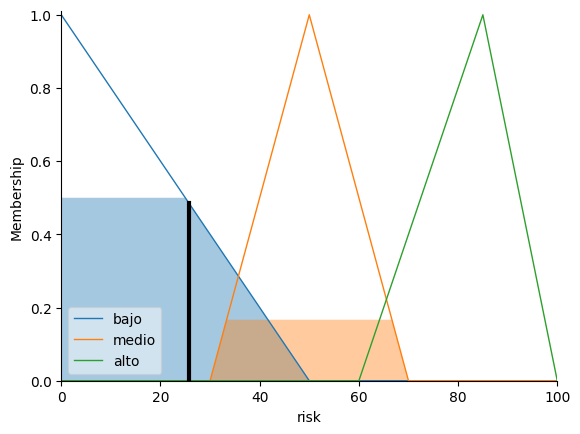

In [167]:
# 10. Ejemplo puntual de defusificación.
# Asignar inputs para ejemplo
sim_healthy = ctrl.ControlSystemSimulation(sistema)
sim_healthy.input['obesidad']  = 17
sim_healthy.input['sbp']       = 90
sim_healthy.input['ldl']       = 80
sim_healthy.input['adiposity'] = 15
sim_healthy.input['typea']     = 30
sim_healthy.input['alcohol']   = 0
sim_healthy.input['tobacco']   = 0
sim_healthy.input['age']       = 25
sim_healthy.input['famhist']   = 0
sim_healthy.compute()
risk.view(sim=sim_healthy); plt.show()

50.00000000000001


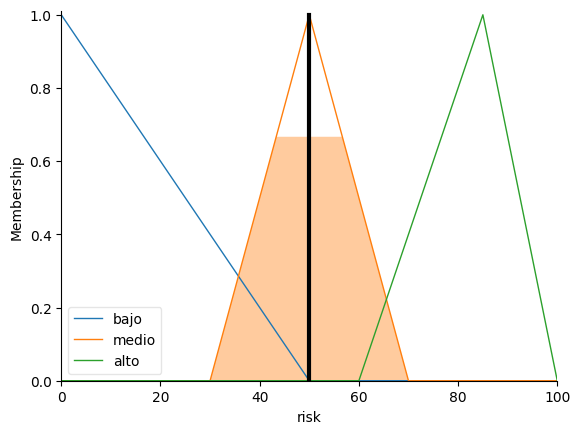

In [168]:
sim_test = ctrl.ControlSystemSimulation(sistema)
sim_test.input['obesidad'] = 27
sim_test.input['sbp'] = 120
sim_test.input['ldl'] = 120
sim_test.input['adiposity'] = 22
sim_test.input['typea'] = 50
sim_test.input['alcohol'] = 50
sim_test.input['tobacco'] = 8
sim_test.input['age'] = 45
sim_test.input['famhist'] = 0
sim_test.compute()
print(sim_test.output['risk'])

risk.view(sim=sim_test); plt.show()

In [170]:
# Clasificación difusa a 3 clases: bajo (0), medio (1), alto (2)
def clasificar_riesgo(valor):
    if valor < 40:
        return 0  # Bajo
    elif valor < 70:
        return 1  # Medio
    else:
        return 2  # Alto

df['pred_risk_class'] = df['risk_fuzzy'].apply(clasificar_riesgo)


In [171]:
# Comparar difuso con CHD binaria: definir alto riesgo como predicción positiva
df['pred_chd'] = (df['risk_fuzzy'] > 60).astype(int)


In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Comparar con columna real 'chd'
y_true = df['chd']
y_pred = df['pred_chd']

cm = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Matriz de Confusión:\n", cm)
print("Accuracy: ", round(acc, 2))
print("Precisión:", round(precision, 2))
print("Sensibilidad (Recall):", round(recall, 2))


Matriz de Confusión:
 [[259  43]
 [109  51]]
Accuracy:  0.67
Precisión: 0.54
Sensibilidad (Recall): 0.32


# Arboles de decisión

In [209]:
import io
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


In [186]:
df_tree.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_bin
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


In [187]:
# Comparación con modelos de ML
features = ['obesity','sbp','ldl','adiposity','typea','alcohol','tobacco','age']
df_tree['famhist_bin'] = df_tree['famhist'].apply(lambda x: 1 if x == 'Present' else 0)
X = df_tree[features + ['famhist_bin']]
y = df_tree['chd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [207]:
# Modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))



Random Forest
Matriz de Confusión:
 [[77 13]
 [27 22]]
Accuracy: 0.7122302158273381
Precisión: 0.6285714285714286
Recall: 0.4489795918367347


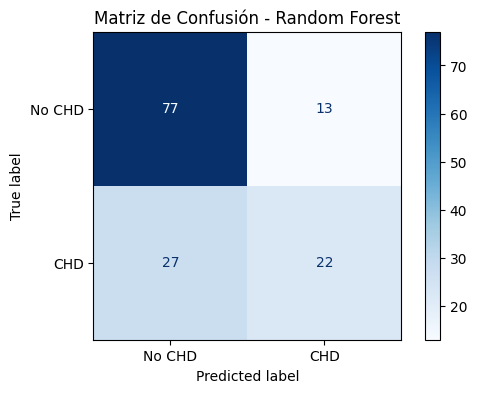

     Métrica  Random Forest
0   Accuracy       0.712230
1  Precisión       0.628571
2     Recall       0.448980


In [210]:
# Matriz de confusión Random Forest
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['No CHD', 'CHD'], cmap='Blues', ax=ax)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Resultados en tabla
rf_results = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precisión', 'Recall'],
    'Random Forest': [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf)
    ]
})
print(rf_results)

In [189]:
# Modelo Random Forest con GridSearch
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
print("\nRandom Forest (con GridSearch)")
print("Mejores parámetros:", grid_rf.best_params_)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))



Random Forest (con GridSearch)
Mejores parámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Matriz de Confusión:
 [[75 15]
 [27 22]]
Accuracy: 0.697841726618705
Precisión: 0.5945945945945946
Recall: 0.4489795918367347


In [213]:

# Modelo XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precisión:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))


XGBoost
Matriz de Confusión:
 [[72 18]
 [25 24]]
Accuracy: 0.6906474820143885
Precisión: 0.5714285714285714
Recall: 0.4897959183673469


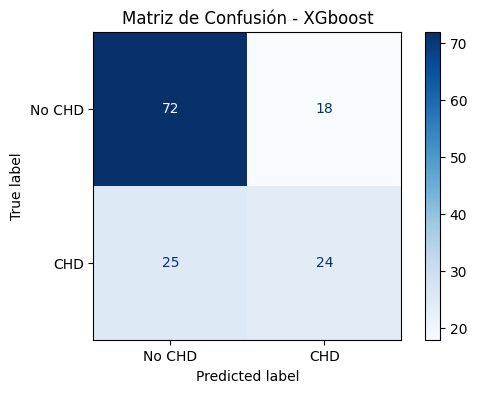

     Métrica   XGboost
0   Accuracy  0.690647
1  Precisión  0.571429
2     Recall  0.489796


In [215]:
# Matriz de confusión Xgboost
fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=['No CHD', 'CHD'], cmap='Blues', ax=ax)
plt.title('Matriz de Confusión - XGboost')
plt.show()

# Resultados en tabla
xgb_results = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precisión', 'Recall'],
    'XGboost': [
        accuracy_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_xgb)
    ]
})
print(xgb_results)

In [183]:
# Modelo XGBoost con RandomizedSearch
param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [0.5, 1.0, 1.5]
}
random_xgb = RandomizedSearchCV(XGBClassifier( eval_metric='logloss'),
                                param_distributions=param_dist_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_xgb.fit(X_train, y_train)
y_pred_xgb = random_xgb.predict(X_test)
print("\nXGBoost (con RandomizedSearch)")
print("Mejores parámetros:", random_xgb.best_params_)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precisión:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))



XGBoost (con RandomizedSearch)
Mejores parámetros: {'subsample': 0.6, 'reg_lambda': 1.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Matriz de Confusión:
 [[85  5]
 [43  6]]
Accuracy: 0.6546762589928058
Precisión: 0.5454545454545454
Recall: 0.12244897959183673


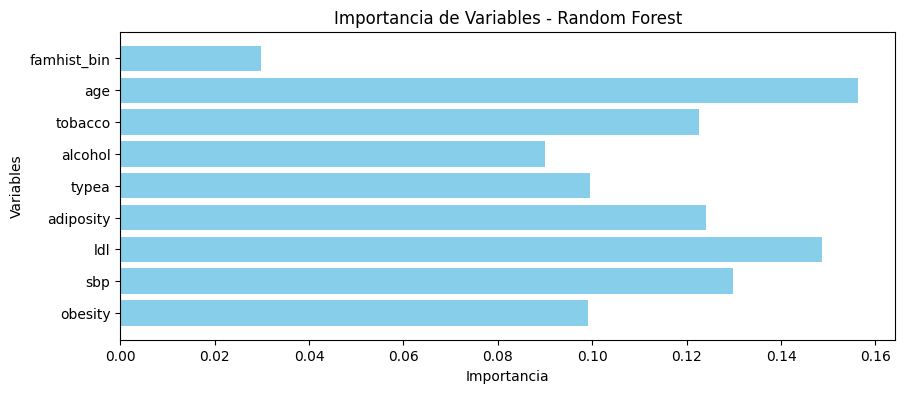

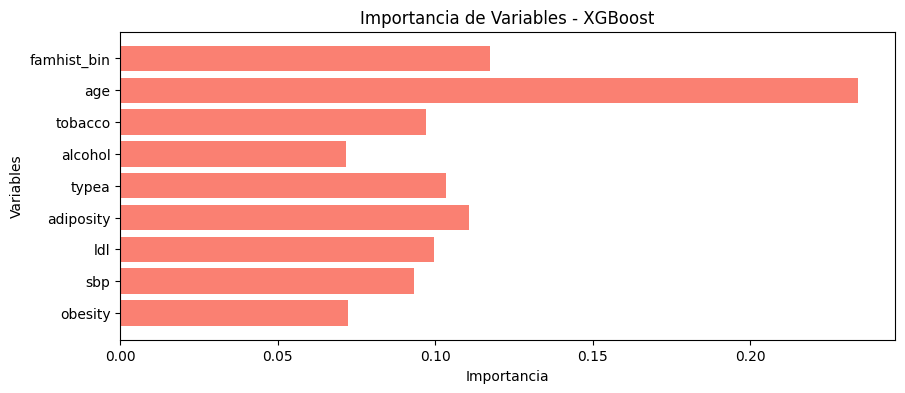

In [216]:
import matplotlib.pyplot as plt
importances_rf = rf.feature_importances_
importances_xgb = xgb.feature_importances_
features_names = X.columns

# Gráfica Random Forest
plt.figure(figsize=(10,4))
plt.barh(features_names, importances_rf, color='skyblue')
plt.title('Importancia de Variables - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()

# Gráfica XGBoost
plt.figure(figsize=(10,4))
plt.barh(features_names, importances_xgb, color='salmon')
plt.title('Importancia de Variables - XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()
